In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import *
from sklearn.neighbors import KNeighborsClassifier

random.seed(0)
np.random.seed(0)

In [2]:
data = pd.read_csv('Pima.csv',sep=',', 
                  names=["Pregnancies", "Glucose", "BloodPressure", "SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age","Output"])
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Output
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
Y = data[['Output']]
Y

,Output
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


In [4]:
X = data[["Pregnancies", "Glucose", "BloodPressure", "SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]]
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [5]:
x_train,x_test, y_train,y_test = train_test_split(X,Y,test_size=0.2)

In [6]:
x_train.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,3.874593,120.895765,69.226384,20.623779,82.136808,32.206678,0.466471,33.594463
std,3.443637,31.809725,19.550893,16.052529,117.491581,7.914276,0.333203,12.016168
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.500000,0.238000,24.000000
50%,3.000000,117.500000,72.000000,23.000000,37.000000,32.400000,0.369000,29.000000
75%,6.000000,141.000000,80.000000,32.750000,130.000000,36.775000,0.606500,41.000000
max,17.000000,198.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


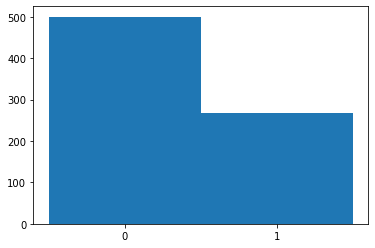

In [7]:
fig,ax = plt.subplots();
ax.hist(Y,bins=range(3),align='left')
ax.set_xticks(range(2))

In [8]:
knnAccu = []
for i in range(1,16):
    knn =KNeighborsClassifier(n_neighbors=i)
    cvs = cross_val_score(knn, x_train, y_train.values.ravel(),scoring='accuracy', verbose=0)
    avgAccu = np.average(cvs)
    knnAccu.append(avgAccu)

knnAccu

[0.6660669065707051,
 0.6954418232706917,
 0.6759296281487407,
 0.6906037584966013,
 0.7085699053711847,
 0.7248300679728109,
 0.7199386911901906,
 0.7182460349193656,
 0.7150073304011728,
 0.7199120351859256,
 0.7248034119685458,
 0.7182593629214982,
 0.7150206584033054,
 0.7247900839664134,
 0.7166600026656005]

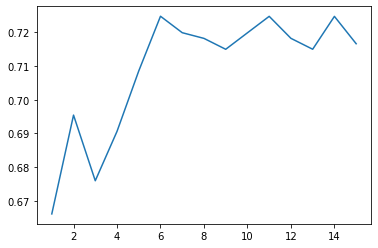

In [9]:
fig,ax = plt.subplots();
ax.plot(np.array(range(1,16)),knnAccu)

<b>Best k found = 6</b>

In [10]:
knn =KNeighborsClassifier(n_neighbors=6)
knn.fit(x_train,y_train.values.ravel())
knn.predict(x_test)
knn.score(x_test,y_test)

0.7792207792207793

In [11]:
def normalize(data,feature):
    data_n=[]
    avg = data[feature].mean()
    std = data[feature].std()
    for i in data[feature]:
        data_n.append((i-avg)/std)
    return data_n

In [12]:
train_n = {}
for i in range(0,8):
    train_n[x_train.columns[i]]=normalize(x_train,x_train.columns[i])
#train_n[y_train.columns[0]]=normalize(y_train,y_train.columns[0])

In [13]:
print(len(train_n['Pregnancies']))

614


In [14]:
x_train_n = pd.DataFrame(train_n,columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'])

In [15]:
x_train_n.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02
mean,-8.245305e-17,5.017702e-17,4.918252e-17,8.896250e-17,-8.643104e-17,-3.099945e-15,1.566789e-15,-3.905671e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.125146e+00,-3.800591e+00,-3.540830e+00,-1.284768e+00,-6.990868e-01,-4.069441e+00,-1.165867e+00,-1.048126e+00
25%,-8.347549e-01,-6.883356e-01,-3.696191e-01,-1.284768e+00,-6.990868e-01,-5.947073e-01,-6.856797e-01,-7.984628e-01
50%,-2.539736e-01,-1.067524e-01,1.418664e-01,1.480279e-01,-3.841706e-01,2.442706e-02,-2.925262e-01,-3.823567e-01
75%,6.171984e-01,6.320153e-01,5.510549e-01,7.554088e-01,4.073755e-01,5.772256e-01,4.202520e-01,6.162978e-01
max,3.811496e+00,2.423920e+00,2.699294e+00,4.882484e+00,6.501429e+00,4.408909e+00,5.862877e+00,3.945146e+00


In [16]:
test_n = {}
for i in range(0,8):
    test_n[x_test.columns[i]]=normalize(x_test,x_test.columns[i])
x_test_n = pd.DataFrame(test_n,columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'])


In [18]:
knnAccu = []
for i in range(1,16):
    knn =KNeighborsClassifier(n_neighbors=i)
    cvs = cross_val_score(knn, x_train_n, y_train.values.ravel(),scoring='accuracy', verbose=0)
    avgAccu = np.average(cvs)
    knnAccu.append(avgAccu)

knnAccu

[0.6856723977075836,
 0.6889244302279088,
 0.7052245768359323,
 0.7003198720511795,
 0.7182327069172331,
 0.6954684792749567,
 0.7133946421431429,
 0.7051979208316673,
 0.7133679861388778,
 0.70687724910036,
 0.7182726909236306,
 0.7198587231773956,
 0.7329468212714914,
 0.7313074770091963,
 0.7296947887511662]

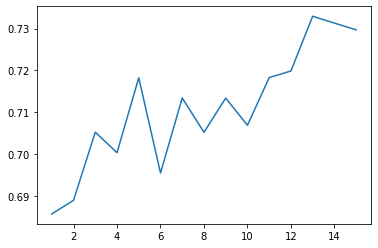

In [19]:
fig,ax = plt.subplots();
ax.plot(np.array(range(1,16)),knnAccu)

In [20]:
knn =KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train_n,y_train.values.ravel().astype('int'))
knn.predict(x_test_n)
knn.score(x_test_n,y_test.values.ravel().astype('int'))

0.8181818181818182